In [1]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [11]:
def mse_plot(ax, y, y_pred, tspec, plot_patches=True):
    y_shape=y.shape
    synpotic_window=14
    training_length = round(tspec['training_validation_length']*tspec['validation_split'])
    max_height=2
    
    y_ts = y.view().reshape((y_shape[0], np.prod(y_shape[1:])))
    y_pred_ts = y_pred.view().reshape((y_shape[0], np.prod(y_shape[1:])))
    mse_ts = np.mean((y_ts-y_pred_ts)**2,axis=1)
    ts = np.arange(y_ts.shape[0])/4

    
    ax.plot(ts, mse_ts)
    if plot_patches: 
        ax.add_patch(Rectangle(((tspec['trainig_day']-tspec['training_validation_length']), 0),tspec['training_validation_length'], 
                       max_height,color='g',alpha=0.1,ec='g'))
        ax.add_patch(Rectangle(((tspec['trainig_day']), 0),synpotic_window, max_height,color='r',alpha=0.1,ec='g'))
    ax.plot((tspec['trainig_day']-tspec['training_validation_length']+training_length)*np.array([1,1]),
            np.array([0,max_height]),'g',linewidth=0.5)
    ax.set_ylim(0,max_height)
    ax.set_xlim(0,max(ts))

    

In [13]:
tspec=dict()
tspec['trainig_day']=375
tspec['training_validation_length']=365
tspec['validation_split']=0.7
magic_line="4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_{}_{}_{}.npy".format(
    tspec['trainig_day'],tspec['training_validation_length'],tspec['validation_split'])
tspec['validation_split']=1


tspec2=dict()
tspec2['trainig_day']=463
tspec2['training_validation_length']=14
tspec2['validation_split']=0.7
magic_line2="4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_{}_{}_{}.npy".format(
    tspec2['trainig_day'],tspec2['training_validation_length'],tspec2['validation_split'])




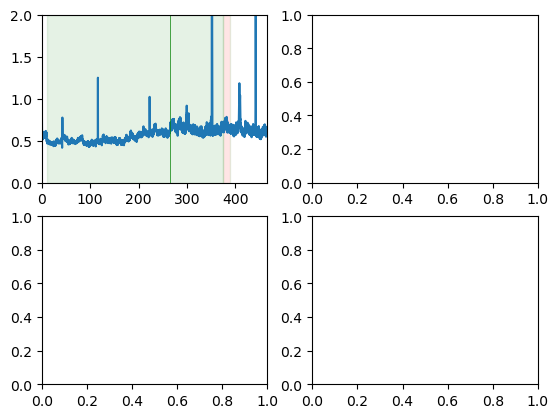

In [4]:
fig, axs = plt.subplots(2,2)
axs_flat = axs.view().reshape(axs.size)
for var in ['t','q','u','v']:
    display('npys/ypred_conv2d_tpsuvq_online_'+varn+'_'+magic_line)
    y_pred = np.load('npys/ypred_conv2d_tpsuvq_online_'+varn+'_'+magic_line)
    y = np.load('npys/y_conv2d_tpsuvq_online_'+varn+'_'+magic_line)
    mse_plot(axs_flat[0], y, y_pred, tspec)


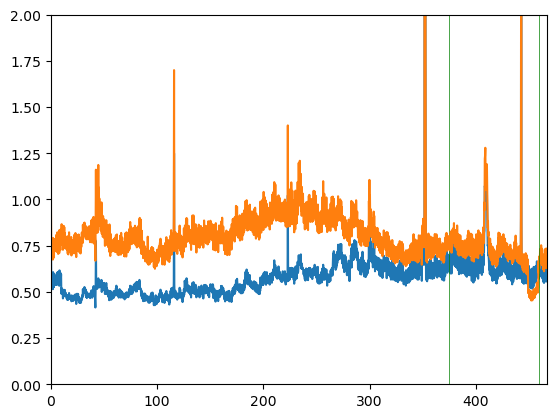

In [14]:
varn='t'

y_pred = np.load('npys/ypred_conv2d_tpsuvq_online_'+varn+'_'+magic_line)
y = np.load('npys/y_conv2d_tpsuvq_online_'+varn+'_'+magic_line)
y_pred2 = np.load('npys/ypred_conv2d_tpsuvq_online_'+varn+'_'+magic_line2)

fig, ax = plt.subplots()
mse_plot(ax, y, y_pred, tspec, plot_patches=False)
mse_plot(ax, y, y_pred2, tspec2, plot_patches=False)


In [4]:
display('npys/ypred_conv2d_tpsuvq_online_'+varn+'_'+magic_line)
y_pred = np.load('npys/ypred_conv2d_tpsuvq_online_'+varn+'_'+magic_line)
y = np.load('npys/y_conv2d_tpsuvq_online_'+varn+'_'+magic_line)


'npys/ypred_conv2d_tpsuvq_online_t_4_1_4096_3_0.25_8_mse_0.0001_0.05_sub_463_14_0.7.npy'

In [46]:
y_shape=y.shape

y_ts=y.view().reshape((y_shape[0], np.prod(y_shape[1:])))
y_pred_ts=y_pred.view().reshape((y_shape[0], np.prod(y_shape[1:])))

ts = np.arange(y_ts.shape[0])/4


(0.0, 2000.0)

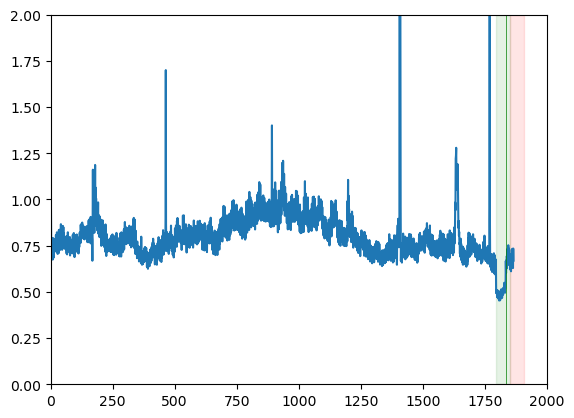

In [42]:
max_height=2
fig, ax = plt.subplots()
ax.plot(np.mean((y_ts-y_pred_ts)**2,axis=1))
ax.add_patch(Rectangle(((trainig_day-training_validation_length)*4, 0),training_validation_length*4, max_height,color='g',alpha=0.1))
ax.add_patch(Rectangle(((trainig_day)*4, 0),synpotic_window*4, max_height,color='r',alpha=0.1))
ax.plot((trainig_day-training_validation_length+training_length)*np.array([1,1])*4,np.array([0,max_height]),
        'g',linewidth=0.5)
ax.set_ylim(0,max_height)
ax.set_xlim(0,2000)


(0.0, 466.5)

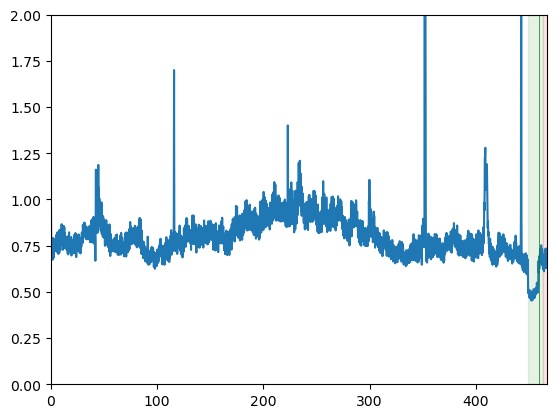

In [49]:
max_height=2
fig, ax = plt.subplots()
ax.plot(ts,np.mean((y_ts-y_pred_ts)**2,axis=1))
ax.add_patch(Rectangle(((trainig_day-training_validation_length), 0),training_validation_length, 
                       max_height,color='g',alpha=0.1))
ax.add_patch(Rectangle(((trainig_day), 0),synpotic_window, max_height,color='r',alpha=0.1))
ax.plot((trainig_day-training_validation_length+training_length)*np.array([1,1]),np.array([0,max_height]),
        'g',linewidth=0.5)
ax.set_ylim(0,max_height)
ax.set_xlim(0,max(ts))